In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

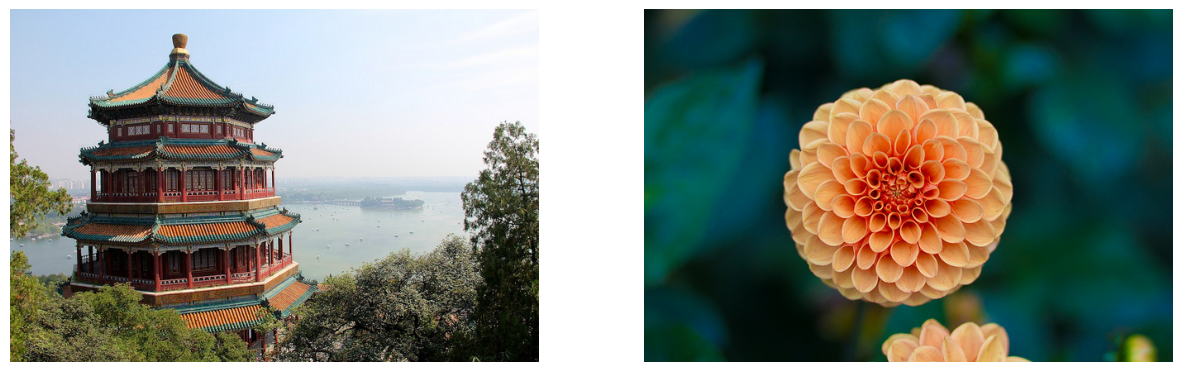

In [ ]:
images=load_sample_images()["images"]
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off');

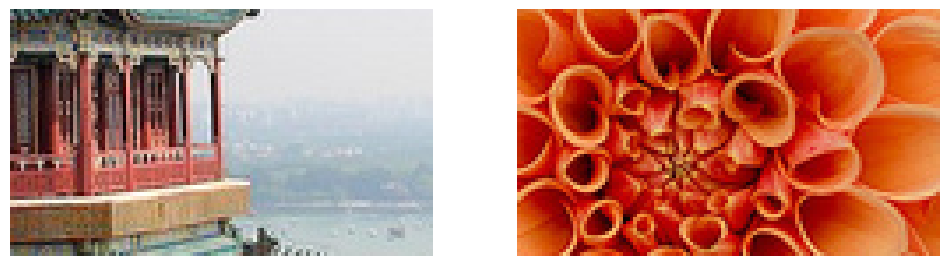

In [ ]:
images=tf.keras.layers.CenterCrop(height=70,width=120)(images)
images=tf.keras.layers.Rescaling(scale=1/255.)(images)
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off');

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
tf.random.set_seed(42)
conv_layer=tf.keras.layers.Conv2D(filters=32,kernel_size=7)
fmaps=conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 64, 114, 32])

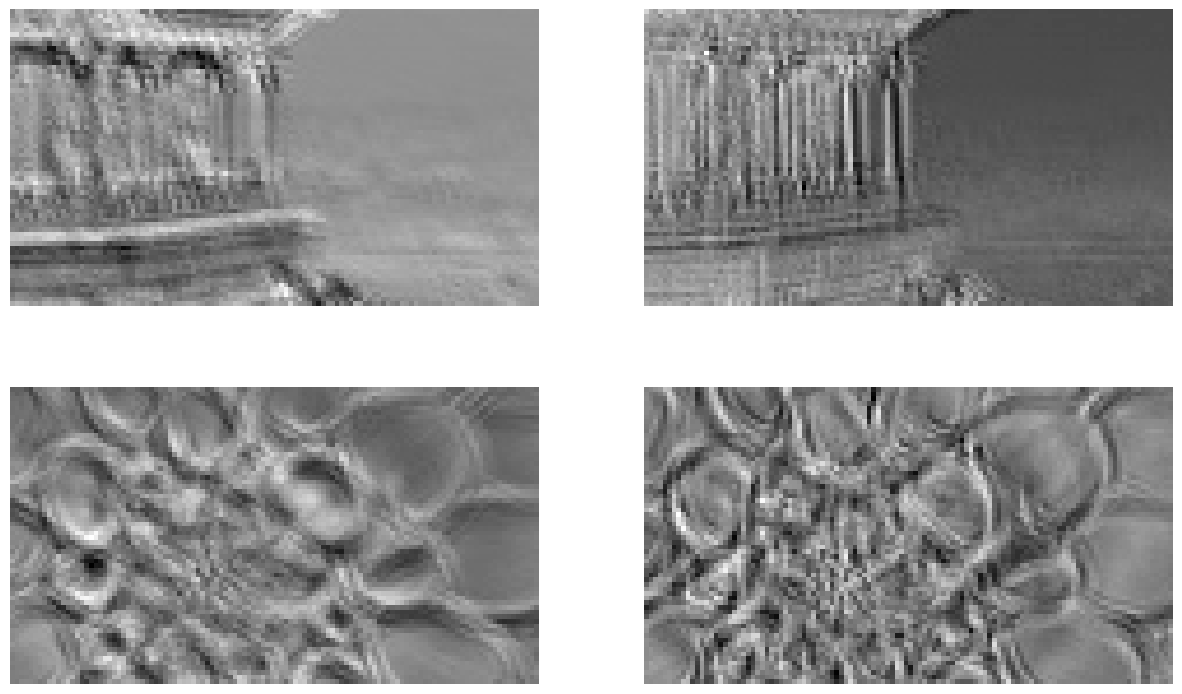

In [ ]:
#extra code--displays the two output feauture maps for each image

plt.figure(figsize=(15,9))
for image_idx in (0,1):
  for fmap_idx in (0,1):
    plt.subplot(2,2,image_idx*2+fmap_idx+1)
    plt.imshow(fmaps[image_idx,:,:,fmap_idx],cmap="gray")
    plt.axis("off")

plt.show()

In [ ]:
conv_layer=tf.keras.layers.Conv2D(filters=32,kernel_size=7,padding='same')
fmaps=conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [ ]:
conv_layer=tf.keras.layers.Conv2D(filters=32,kernel_size=7,padding='same',
                                  strides=2)
fmaps=conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

In [ ]:
tf.random.set_seed(42)
filters=tf.random.normal([7,7,3,2])
biases=tf.zeros([2])
fmaps=tf.nn.conv2d(images,filters,strides=1,padding="SAME") + biases

#Pooling Layers

#Implementing Pooling Layers With Keras

#Max pooling

In [ ]:
max_pool=tf.keras.layers.MaxPool2D(pool_size=2)

In [ ]:
output=max_pool(images)

In [ ]:
global_avg_pol=tf.keras.layers.GlobalAvgPool2D()

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
global_avg_pool=tf.keras.layers.Lambda(
    lambda X: tf.reduce_mean(X,axis=[1,2]))

In [ ]:
global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.643388  , 0.59718215, 0.5825038 ],
       [0.7630747 , 0.26010972, 0.10848834]], dtype=float32)>

#CNN Architectures

#Tackling Fashion MNIST With a CNN

In [ ]:
import numpy as np

mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=mnist
X_train_full=np.expand_dims(X_train_full,axis=-1).astype(np.float32) /255
X_test=np.expand_dims(X_test.astype(np.float32),axis=-1) /255
X_train,X_valid=X_train_full[:-5000],X_train_full[-5000:]
y_train,y_valid=y_train_full[:-5000],y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28, 1)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28,1]),
    tf.keras.layers.Conv2D(64,padding='same',kernel_size=7,
                           activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,padding='same',kernel_size=3,
                           activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(128,padding='same',kernel_size=3,
                           activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256,padding='same',kernel_size=3,
                           activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(256,padding='same',kernel_size=3,
                           activation='relu',kernel_initializer='he_normal'),

    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',
              metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))
score=model.evaluate(X_test,y_test)
X_new=X_test[:10]
y_pred=model.predict(X_new)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - accuracy: 0.6347 - loss: 1.0329 - val_accuracy: 0.8592 - val_loss: 0.4020
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8534 - loss: 0.4307 - val_accuracy: 0.8874 - val_loss: 0.3242
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8804 - loss: 0.3526 - val_accuracy: 0.9000 - val_loss: 0.2771
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.8930 - loss: 0.3151 - val_accuracy: 0.8938 - val_loss: 0.2947
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9042 - loss: 0.2881 - val_accuracy: 0.9042 - val_loss: 0.2735
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9112 - loss: 0.2614 - val_accuracy: 0.8994 - val_loss: 0.3033
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9155 - loss: 0.2526 - val_accuracy: 0.9084 - val_loss: 0.2621
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9175 - loss: 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,241,505 (16.18 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,827,671 (10.79 MB)

#Implementing a ResNet-34 CNN Using Keras

In [ ]:
from functools import partial

DefaultConv2D=partial(tf.keras.layers.Conv2D,kernel_size=3,strides=1,
                      padding='same',kernel_initializer='he_normal',use_bias=False)

class ResidualUnit(tf.keras.layers.Layer):
  def __init__(self,filters,strides=1,activation='relu',**kwargs):
    super().__init__(**kwargs)
    self.activation=tf.keras.activations.get(activation)
    self.main_layers=[
        DefaultConv2D(filters,strides=strides),
        tf.keras.layers.BatchNormalization(),
        self.activation,
        DefaultConv2D(filters),
        tf.keras.layers.BatchNormalization()
    ]
    self.skip_layers=[]
    if strides>1:
      self.skip_layers=[
          DefaultConv2D(filters,kernel_size=1,strides=strides),
          tf.keras.layers.BatchNormalization()
      ]
  def call(self,inputs):
    Z=inputs
    for layer in self.main_layers:
      Z=layer(Z)
    skip_Z=inputs
    for layer in self.skip_layers:
      skip_Z=layer(skip_Z)
    return self.activation(Z+skip_Z)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28,1]),
    DefaultConv2D(64,kernel_size=7,strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=3,strides=2,padding='same')
])
prev_filters=64
for filters in [64]*3+[128]*4+[256]*6+[512]*3:
  strides=1 if filters==prev_filters else 2
  model.add(ResidualUnit(filters,strides=strides))
  prev_filters=filters

model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Dense(10,activation='softmax'))

#Using Pretrained Models from Keras

In [ ]:
model=tf.keras.applications.ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
images=load_sample_images()['images']
images_stacked=tf.stack(images,axis=0)
images_resized=tf.keras.layers.Resizing(height=224,width=224,
                                        crop_to_aspect_ratio=True)(images_stacked)

In [ ]:
inputs=tf.keras.applications.resnet50.preprocess_input(images_resized)

In [ ]:
inputs=tf.cast(inputs,tf.float32)

In [ ]:
Y_proba=model.predict(inputs)
Y_proba.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


(2, 1000)

In [ ]:
top_K=tf.keras.applications.resnet50.decode_predictions(Y_proba,top=3)
for image_index in range(len(images)):
  print(f"Image #{image_index}")
  for class_id,name,y_proba in top_K[image_index]:
    print(f" {class_id}-{name:12s} {y_proba:.2%}")

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Image #0
 n03877845-palace       54.83%
 n03781244-monastery    24.40%
 n02825657-bell_cote    18.74%
Image #1
 n04522168-vase         32.17%
 n11939491-daisy        17.87%
 n03530642-honeycomb    12.03%


#Pretrained Models for Transfer Learning

In [ ]:
import tensorflow_datasets as tfds

dataset,info=tfds.load("tf_flowers",as_supervised=True,with_info=True)
dataset_size=info.splits['train'].num_examples
class_names=info.features['label'].names
n_classes=info.features['label'].num_classes

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.ISTXYM_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
dataset_size

3670

In [ ]:
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [ ]:
n_classes

5

In [ ]:
test_set_raw,valid_set_raw,train_set_raw=tfds.load(
    "tf_flowers",
    split=["train[:10%]","train[10%:25%]","train[25%:]"],
    as_supervised=True
)

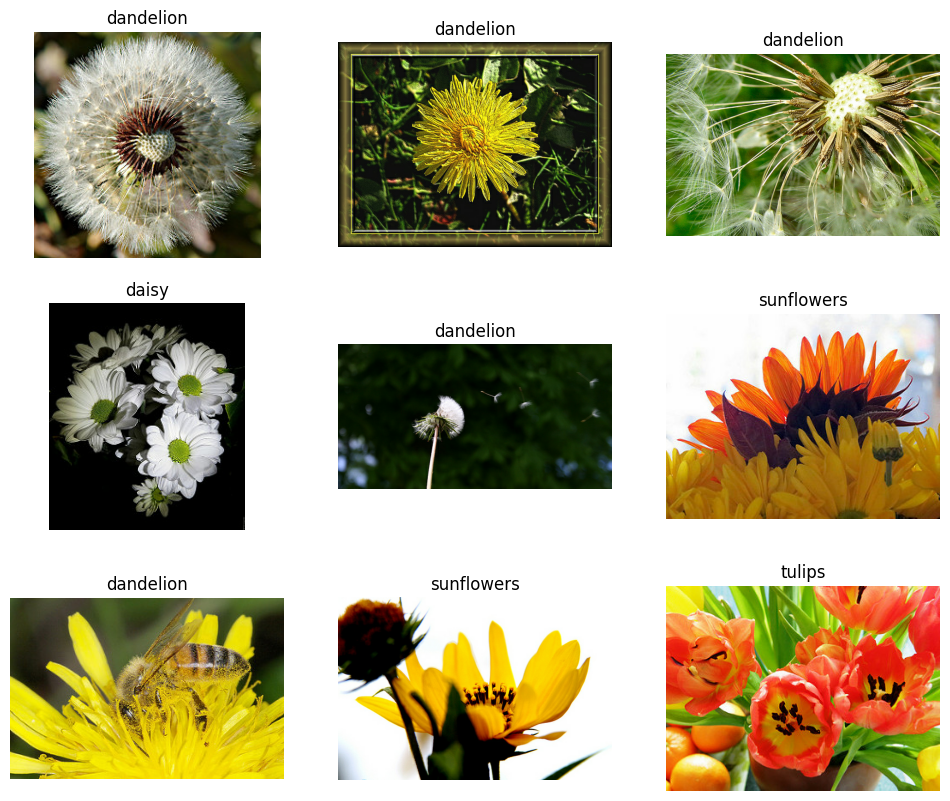

In [ ]:
import matplotlib.pyplot as plt

index=0
plt.figure(figsize=(12,10))
for image,label in train_set_raw.take(9):
  index += 1
  plt.subplot(3,3,index)
  plt.imshow(image)
  plt.title(class_names[label])
  plt.axis('off')

In [ ]:
tf.keras.backend.clear_session()

batch_size=32
preprocess=tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224,width=224,crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])

train_set=train_set_raw.map(lambda X,y: (preprocess(X),y))
train_set=train_set.shuffle(1000,seed=42).batch(batch_size).prefetch(1)
valid_set=valid_set_raw.map(lambda X,y:(preprocess(X),y)).batch(batch_size)
test_set=test_set_raw.map(lambda X,y:(preprocess(X),y)).batch(batch_size)

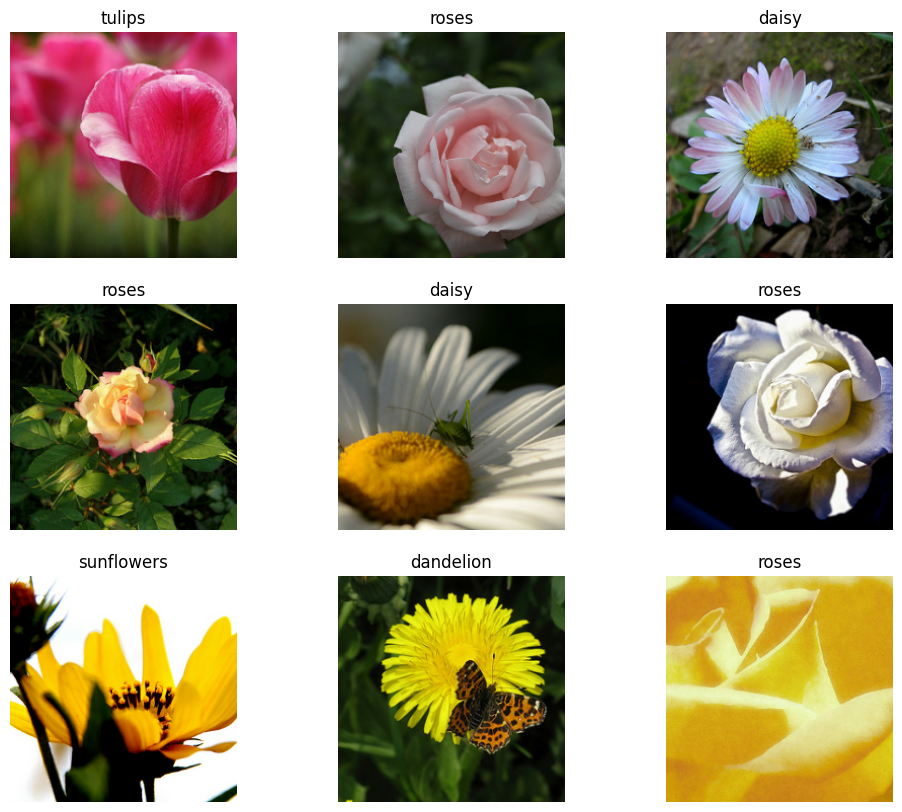

In [ ]:
index=0

plt.figure(figsize=(12,10))
for image_batch,label_batch in train_set.take(1):
  for index in range(9):
    plt.subplot(3,3,index+1)
    plt.imshow((image_batch[index]+1)/2)
    plt.title(class_names[label_batch[index]])
    plt.axis('off');

In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode='horizontal',seed=42),
    tf.keras.layers.RandomRotation(factor=0.4,seed=42)
    # tf.keras.layers.RandomContrast(factor=0.2,seed=42)
])

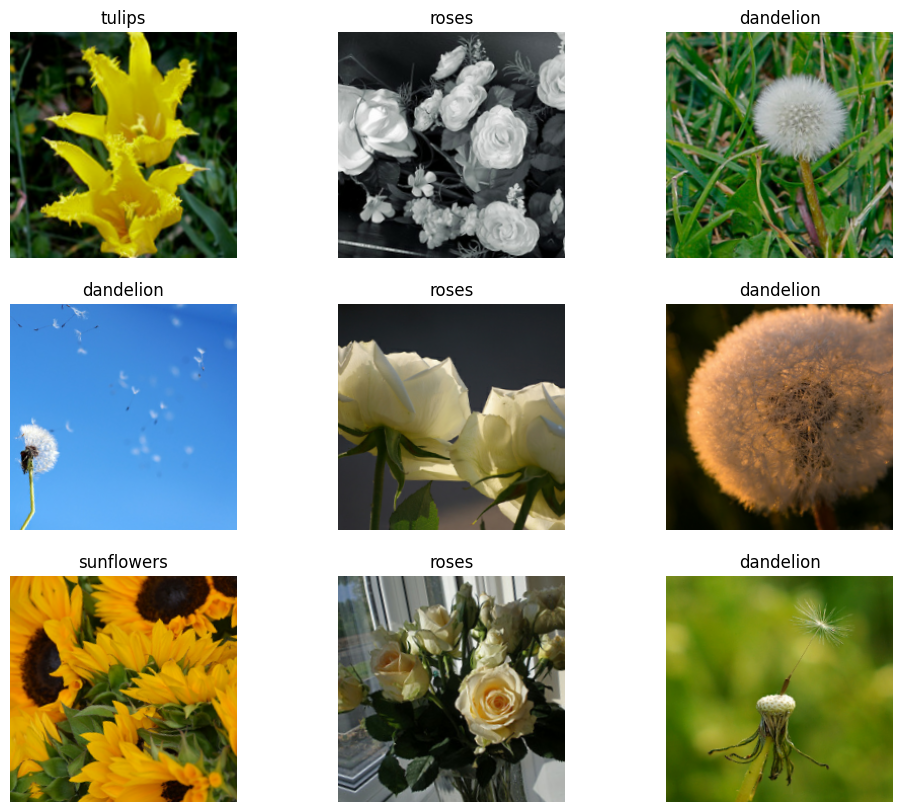

In [ ]:
import numpy as np
plt.figure(figsize=(12,10))
for X_batch,y_batch in train_set.take(1):
  X_batch_augmented=data_augmentation(X_batch)
  for index in range(9):
    plt.subplot(3,3,index+1)
    plt.imshow(X_batch_augmented[index]/2+0.5)
    plt.axis('off')
    plt.title(class_names[y_batch[index]])

In [ ]:
n_classes

5

In [ ]:
tf.random.set_seed(42)
base_model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=False)

avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output=tf.keras.layers.Dense(n_classes,activation='softmax')(avg)
model=tf.keras.Model(inputs=base_model.input,outputs=output)

In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
history=model.fit(train_set,validation_data=valid_set,epochs=3)

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 222ms/step - accuracy: 0.7452 - loss: 0.8528 - val_accuracy: 0.8421 - val_loss: 0.7623
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.8902 - loss: 0.3901 - val_accuracy: 0.8058 - val_loss: 1.0837
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - accuracy: 0.9292 - loss: 0.2483 - val_accuracy: 0.8530 - val_loss: 0.6690


In [ ]:
for layer in base_model.layers[56:]:
  layer.trainable=True

optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history=model.fit(train_set,validation_data=valid_set,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 352ms/step - accuracy: 0.8899 - loss: 0.3386 - val_accuracy: 0.8766 - val_loss: 0.4493
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - accuracy: 0.9858 - loss: 0.0521 - val_accuracy: 0.9056 - val_loss: 0.3603
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 336ms/step - accuracy: 0.9975 - loss: 0.0117 - val_accuracy: 0.9111 - val_loss: 0.3504
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 328ms/step - accuracy: 0.9955 - loss: 0.0119 - val_accuracy: 0.9002 - val_loss: 0.3309
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 334ms/step - accuracy: 0.9997 - loss: 0.0026 - val_accuracy: 0.9165 - val_loss: 0.3046
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 332ms/step - accuracy: 0.9982 - loss: 0.0057 - val_accuracy: 0.9129 - val_loss: 0.3318
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 333ms/step - accuracy: 0.9987 - loss: 0.0041 - val_accuracy: 0.9093 - val_loss: 0.3512
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 333ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accu